# Homework 3

## Imports


In [117]:
# Sklearn Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings

In [118]:
# Images
IMAGES_DIR = Path('images')
IMAGES_DIR.mkdir(parents=True, exist_ok=True)

# Data
DATA_DIR = Path('data')
DATA_DIR.mkdir(parents=True, exist_ok=True)
DATA_FILE = 'winequality-red.csv'
DATA_PATH = DATA_DIR / DATA_FILE

# Load the data
df = pd.read_csv(DATA_PATH, sep=';')

# Show the first 5 rows
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [119]:

# Define features and labels 
X = df.drop("quality", axis=1)
y = df["quality"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=0,
                                                    train_size=0.8)

# Question 1 

/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multi

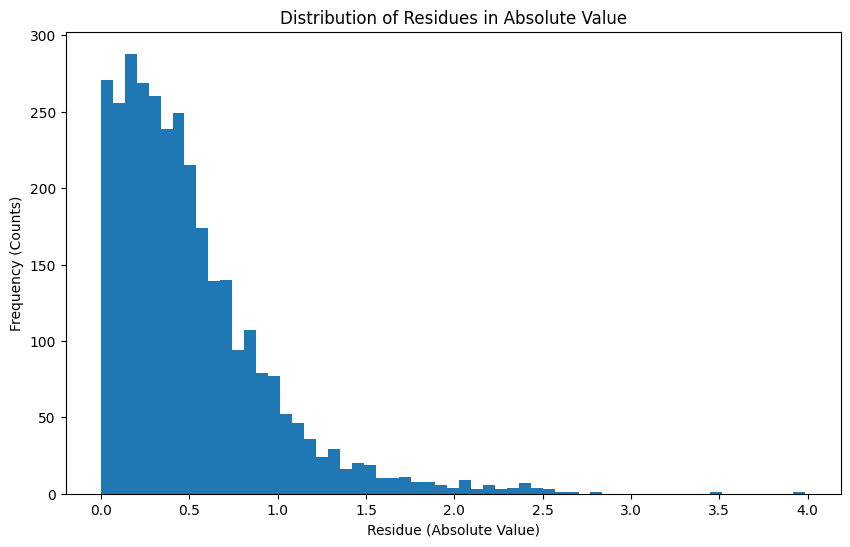

In [120]:
# List for Residues 
residues = []

# MAE list for question 2
mae_list = []
mae_rounded = []
mae_bounded = []
mae_bounded_rounded = []

# RMSE list for question 3
rmse_early = []

# Loop through different values of random_state for MLPClassifier
for random_state in range(1, 11):
    # Create the classifier
    mlp = MLPRegressor(hidden_layer_sizes=(10, 10),
                       activation='relu',
                       early_stopping=True,
                       validation_fraction=0.2,
                       random_state=random_state)
    
    # Fit the classifier to the training data
    mlp.fit(X_train, y_train)

    # Predict the labels of the test set
    y_pred = mlp.predict(X_test)

    # Add the residues to the list
    residues.extend(abs(y_test - y_pred).to_numpy())

    # Calculate the MAE
    mae = mean_absolute_error(y_test, y_pred)
    mae_list.append(mae)

    # Round the predictions
    y_pred_rounded = np.round(y_pred)
    mae_rounded.append(mean_absolute_error(y_test, y_pred_rounded))

    # Bound the predictions
    y_pred_bounded = np.clip(y_pred, 1, 10)
    mae_bounded.append(mean_absolute_error(y_test, y_pred_bounded))

    # Bounded after Rounded
    y_pred_bounded_rounded = np.clip(y_pred_rounded, 1, 10)
    mae_bounded_rounded.append(mean_absolute_error(y_test, y_pred_bounded_rounded))

    # Calculate the RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_early.append(rmse)

# Plot the distribution of residues (in absolute value)
plt.figure(figsize=(10, 6))
plt.hist(residues, bins='auto')
plt.xlabel("Residue (Absolute Value)")
plt.ylabel("Frequency (Counts)")
plt.title("Distribution of Residues in Absolute Value")
# Save the figure
plt.savefig(IMAGES_DIR / "residues.png")
plt.show()
    


## Comment: 
As one can see in the histogram above, the residues resemble to follow an exponential distribution, indicating that the majority of predictions exhibit relatively small errors, while larger prediction errors are less frequent.
This suggests that the model is performing well, as the majority of predictions are close to the true values. However, it also highlights that there are instances where the model produces larger prediction errors, resulting in the exponential tail of the distribution. These larger errors are likely due to more complex or unusual points that are outside the scope of the training of the model.


# Question 2

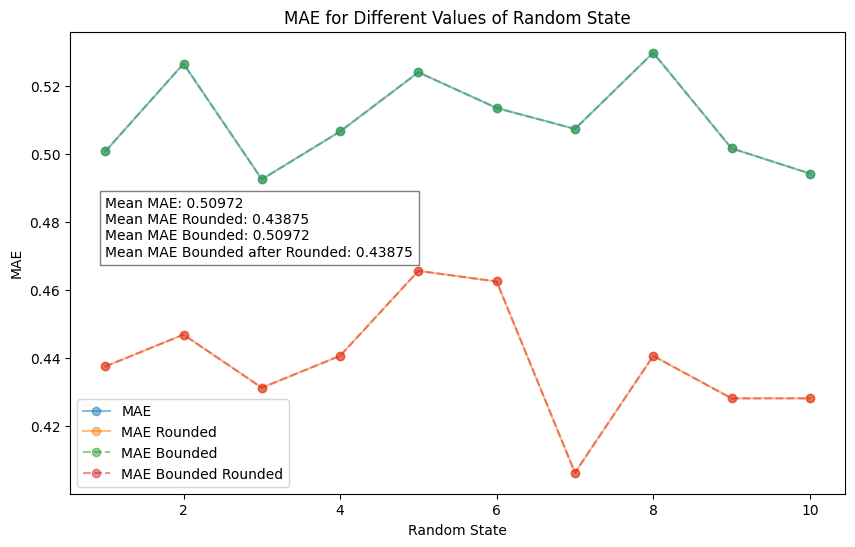

In [121]:
# Plot the MAE for the different values of random_state
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), mae_list, 'o-', label="MAE", alpha=0.5)
plt.plot(range(1, 11), mae_rounded, 'o-', label="MAE Rounded", alpha=0.5)
plt.plot(range(1, 11), mae_bounded, 'o--', label="MAE Bounded", alpha=0.5)
plt.plot(range(1, 11), mae_bounded_rounded, 'o--', label="MAE Bounded Rounded", alpha=0.5)
plt.xlabel("Random State")
plt.ylabel("MAE")
plt.title("MAE for Different Values of Random State")
# Add the Mean MAE for each method on a text box
plt.text(1, 0.47,
         f"Mean MAE: {np.mean(mae_list):.5f} \
         \nMean MAE Rounded: {np.mean(mae_rounded):.5f} \
         \nMean MAE Bounded: {np.mean(mae_bounded):.5f} \
         \nMean MAE Bounded after Rounded: {np.mean(mae_bounded_rounded):.5f}",
         bbox=dict(facecolor='white', alpha=0.5))


plt.legend()
# Save the figure
plt.savefig(IMAGES_DIR / "mae.png")
plt.show()



## Comment:
As seen by the plot above and by the Mean values of the different MAE we can observe that Bounding the data do not change the MAE of the model. This indicates that there are no values for the MAE outside the bounds defined for this operation. 
Beyond that, one can also see that rounding the data to the nearest integer leads to a reduction in the MAE, as this operation minimizes the discrepancy between predicted and actual quality ratings. Hence, the model's performance may appear to improve, especially if the original predictions had small fractional errors.
It's important to highlight that while rounding and bounding (even if in this case bounding does not change nothing at all) can improve the apparent accuracy of the model, it may lead to a loss of information. The original fractional predictions might carry valuable nuances that are discarded in the rounding and bounding process.

# Question 3

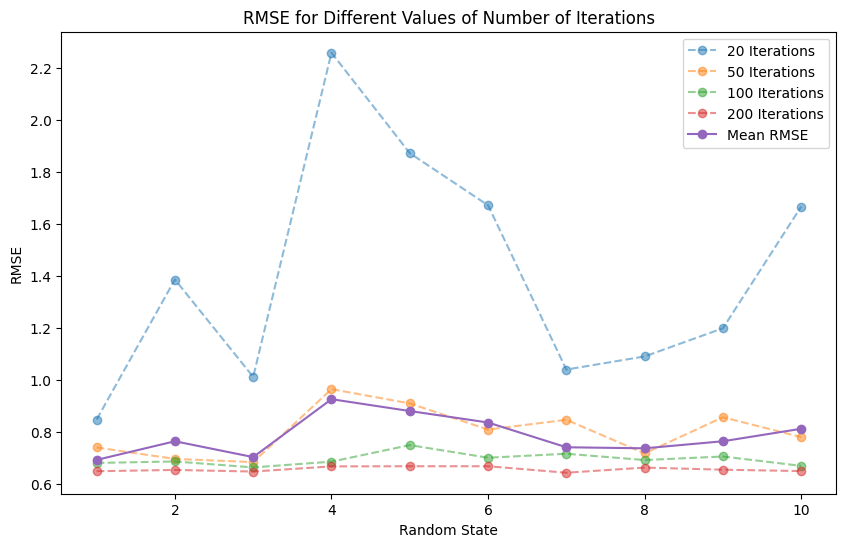

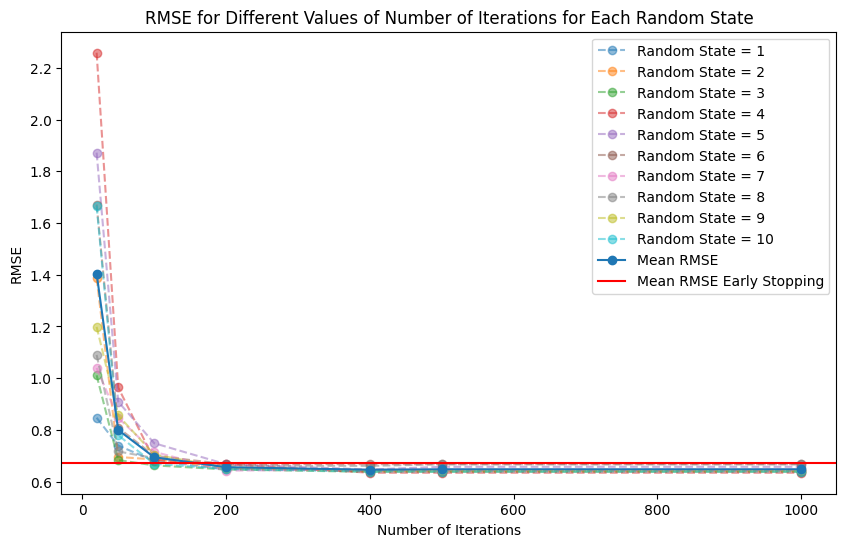

In [122]:
iterations = [20, 50, 100, 200]
rmse_results_matrix = np.zeros((10, len(iterations)))

for random_state in range(1, 11):
    for num_iterations in iterations:
        # Create the classifier
        mlp = MLPRegressor(hidden_layer_sizes=(10, 10),
                           activation='relu',
                           validation_fraction=0.2,
                           max_iter=num_iterations,
                           random_state=random_state)
        
        # Fit the classifier to the training data
        with warnings.catch_warnings():
            warnings.simplefilter("ignore") # Ignore the ConvergenceWarning from sklearn
            mlp.fit(X_train, y_train)

        # Make predictions and calculate RMSE
        predictions = mlp.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, predictions))
        rmse_results_matrix[random_state - 1, iterations.index(num_iterations)] = rmse

# Plot the RMSE for the different values of random_state
plt.figure(figsize=(10, 6))

# Plot the RMSE for the different values of random_state
for i in range(4):
    plt.plot(range(1, 11), rmse_results_matrix[:, i], 'o--', label=f"{iterations[i]} Iterations", alpha=0.5)

# Plot the mean RMSE
plt.plot(range(1, 11), np.mean(rmse_results_matrix, axis=1), 'o-', label="Mean RMSE")

# Graph labels
plt.legend()
plt.xlabel("Random State")
plt.ylabel("RMSE")
plt.title("RMSE for Different Values of Number of Iterations")

# Save the figure
plt.savefig(IMAGES_DIR / "rmse.png")
plt.show()

# Plot the RMSE for different values of iterations for each random state
plt.figure(figsize=(10, 6))
for i in range(10):
    plt.plot(iterations, rmse_results_matrix[i, :], 'o--', label=f"Random State = {i + 1}", alpha=0.5)

# Plot the mean RMSE
plt.plot(iterations, np.mean(rmse_results_matrix, axis=0), 'o-', label="Mean RMSE")
plt.axhline(y=np.mean(rmse_early), color='r', linestyle='-', label="Mean RMSE Early Stopping")
plt.legend()
plt.xlabel("Number of Iterations")
plt.ylabel("RMSE")
plt.title("RMSE for Different Values of Number of Iterations for Each Random State")
# Save the figure
plt.savefig(IMAGES_DIR / "rmse_iterations_random_state.png")
plt.show()


# Question 4

First of all, one need to have in mind that Early Stopping is a technique used to prevent overfitting by monitoring the model's performance on a validation dataset during training and stopping when the performance starts to decrease. It essentially determines the optimal number of iterations automatically. In contrast, setting a specific number of iterations in advance implies that the model will be trained for a fixed number of batch iterations, regardless of its performance.

While using early stopping, the model is trained until the validation performance starts to deteriorate, at which point the training is stopped. This ensures that the model generalizes well to unseen data, improving its performance on the test dataset. In contrast, using a predefined number of iterations may lead to overfitting if the model is trained for too long, or suboptimal performance if the model is trained for too little time.

By analysing the plot from the previous question we can see that we have two situations:
- First, one can see a Decreasing RMSE, which is expected, since the number of iterations is relative small, hence the model do not have sufficient training to converge, resulting in a higher RMSE.
- Secondly, one can see a Steady RMSE, which is also expected, since the number of iterations is appropriate to allow the model to converge to a stable solution. RMSE then remains consistent with early stopping. This is because the model has had enough training to reach a satisfactory performance level.

What one can also expect is that if the number of iterations is very large, the model might start to overfit the training data, causing RMSE to increase. This is because the model continues to improve on the training data while its generalization capability deteriorates. However, the number of iterations used in this case is not large enough to cause overfitting, so the RMSE remains steady.

In general, Early Stopping prevents overfitting by terminating training when the validation performance starts to be steady or when deteriorates. This ensures that the model generalizes well to unseen data. Beyong that, it can also be computationally efficient because it adapts the number of iterations required for training.
Using a fixed number of iterations might seem a wrong choice, but it can also have advantages, since it may lead to faster converngence in some cases. This is advantageous in situations where computational resources or time constraints are limiting factors, because one can have a decreasing RMSE for a long time, but the change might be so small that it is not worth the computational effort. Hence, fixing the number of iterations will stop the training while the early stopping will continue to train the model.
However, one have to have in mind, that very small number of iterations can lead to suboptimal performance and very large number of iterations can lead to overfitting.
